In [1]:
import pandas as pd
# Load dataset
df = pd.read_csv("income_expense_data.csv")
# Group by year and sum income
total_income_per_year = df.groupby("REF_DATE")["Income"].sum()
# Display results
print(total_income_per_year)

REF_DATE
2010    231332020.0
2011    236453650.0
2012    240630900.0
2013    244531010.0
2014    248958970.0
2015    252134020.0
2016    255105340.0
2017    259694610.0
2019    268610440.0
2021    281113150.0
Name: Income, dtype: float64


In [2]:
#calculate the average household expenditure expense

# Group by province and calculate the average expense
avg_expense_per_province = df.groupby("GEO")["Expense"].mean()
# Display results
print(avg_expense_per_province)



GEO
Province 1      9913.831207
Province 10     9294.256487
Province 11    10097.058175
Province 12    12217.614688
Province 13    10725.302000
Province 2      8409.790196
Province 3      8935.938062
Province 4      8601.477487
Province 5      8689.465070
Province 6      8174.689311
Province 7      8358.220356
Province 8     10683.486540
Province 9     11046.595285
Name: Expense, dtype: float64


Matplotlib is building the font cache; this may take a moment.


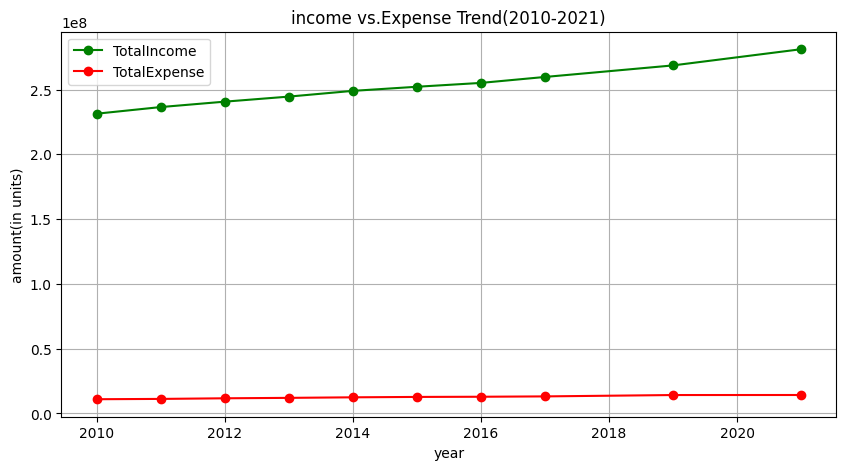

In [3]:
# create a line chart showing yearly total income and total expenses

import matplotlib. pyplot as plt

 # Group by year and sum income & expense
yearly_data = df.groupby("REF_DATE")[["Income", "Expense"]].sum()
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(yearly_data.index, yearly_data["Income"], marker='o', linestyle='-', label="TotalIncome", color='green')
plt.plot(yearly_data.index, yearly_data["Expense"], marker='o', linestyle='-', label="TotalExpense", color='red')

# labels and title

plt.xlabel("year")
plt.ylabel("amount(in units)")
plt.title("income vs.Expense Trend(2010-2021)")

plt.legend()
plt.grid(True)
plt.show()


In [6]:
# find out which family type earns the most on average

# group by family type and calculate the average income
avg_income_family=df.groupby("Family type")["Income"].mean()

#display results
print(avg_income_family.sort_values(ascending=False))


Family type
Couple families    190022.944771
Name: Income, dtype: float64


In [7]:
# Group by Age of older adult and calculate the average expense
avg_expense_by_age = df.groupby("Age of older adult")["Expense"].mean()
# Display results
print(avg_expense_by_age.sort_values(ascending=False))

Age of older adult
55 to 64 years    17136.686247
45 to 54 years    11196.223385
Total all ages     9476.128054
35 to 44 years     8554.008208
25 to 34 years     6509.507579
0 to 24 years      4834.847216
Name: Expense, dtype: float64


In [8]:
import numpy as np
# Compute correlation
correlation = np.corrcoef(df["Income"], df["Expense"])[0, 1]

# Display result
print("Correlation between Income and Expense:", correlation)

Correlation between Income and Expense: nan


In [9]:
# Group by income quintile and sum expenses
expense_by_quintile = df.groupby("Before-tax household income quintile")["Expense"].sum()
# Display results
print(expense_by_quintile.sort_values(ascending=False))

Before-tax household income quintile
Highest quintile    36758192.0
Fourth quintile     24609299.0
All quintiles       20942243.0
Third quintile      18758940.0
Second quintile     14171198.0
Lowest quintile     10158014.0
Name: Expense, dtype: float64


In [10]:
# compare income vs.expense per province
# Group by province and sum income and expenses
income_expense_ratio = df.groupby("GEO")[["Income", "Expense"]].sum()

# Calculate the ratio
income_expense_ratio["Ratio"] = income_expense_ratio["Income"] /income_expense_ratio["Expense"]

# Display results
print(income_expense_ratio.sort_values(by="Ratio", ascending=False))

                   Income     Expense       Ratio
GEO                                              
Province 1   1.814789e+09  10102194.0  179.643059
Province 9   4.170304e+08  11245434.0   37.084418
Province 5   5.107633e+07   8706844.0    5.866228
Province 7   4.373935e+07   8458519.0    5.171041
Province 11  4.881694e+07  10066767.0    4.849317
Province 2   3.358644e+07   8577986.0    3.915423
Province 6   2.656316e+07   8182864.0    3.246194
Province 3   1.727165e+07   8944874.0    1.930899
Province 10  1.397480e+07   9312845.0    1.500594
Province 4   1.218785e+07   8214411.0    1.483716
Province 12  1.521275e+07  12144309.0    1.252665
Province 13  1.251485e+07  10725302.0    1.166853
Province 8   1.180059e+07  10715537.0    1.101260


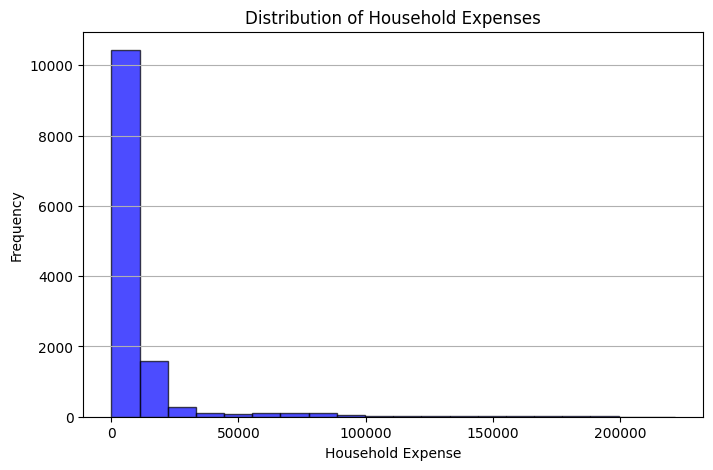

In [11]:
# show a histogram of household expenses

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df["Expense"], bins=20, color='blue', alpha=0.7, edgecolor='black')

# Labels and title
plt.xlabel("Household Expense")
plt.ylabel("Frequency")
plt.title("Distribution of Household Expenses")
plt.grid(axis='y')
plt.show()

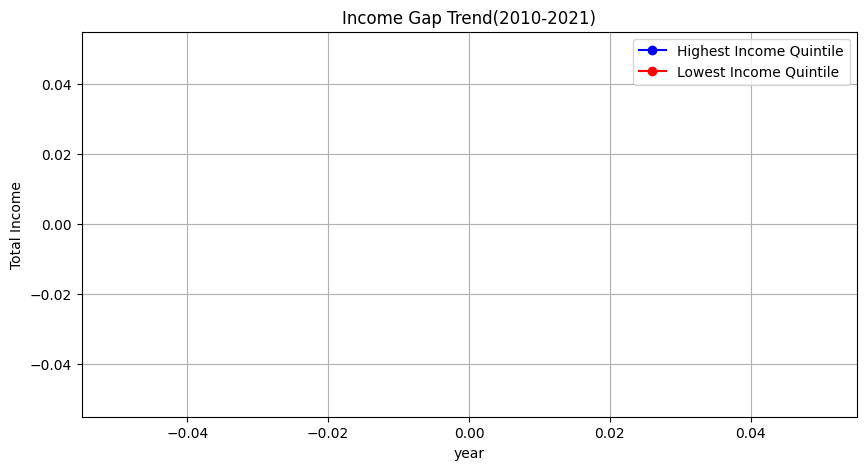

In [12]:
# track the income gap between the highest and lowest quintiles
# Filter data for highest & lowest income quintiles
high_income = df[df["Before-tax household income quintile"] == "Highest"]
low_income = df[df["Before-tax household income quintile"] == "Lowest"]

# Group by year and sum income
high_income_trend = high_income.groupby("REF_DATE")["Income"].sum()
low_income_trend = low_income.groupby("REF_DATE")["Income"].sum()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(high_income_trend.index, high_income_trend, marker='o', linestyle='-',
label="Highest Income Quintile", color='blue')
plt.plot(low_income_trend.index, low_income_trend, marker='o', linestyle='-',
label="Lowest Income Quintile", color='red')

#labels and title
plt.xlabel("year")
plt.ylabel("Total Income")
plt.title("Income Gap Trend(2010-2021)")
plt.legend()
plt.grid(True)
plt.show()



In [13]:
# find out the median of household expenses per province
# Group by province and calculate median expense
median_expense_province = df.groupby("GEO")["Expense"].median()

# Display results
print(median_expense_province.sort_values(ascending=False))

GEO
Province 12    3892.0
Province 8     3552.0
Province 9     3548.5
Province 13    3493.5
Province 11    3331.0
Province 1     3277.0
Province 4     3139.0
Province 3     3084.0
Province 10    3017.0
Province 5     3000.5
Province 2     2954.5
Province 6     2866.0
Province 7     2762.5
Name: Expense, dtype: float64


In [14]:
# Count number of records per province
record_count = df["GEO"].value_counts()
# Display results
print(record_count)

GEO
Province 1     1020
Province 2     1020
Province 3     1020
Province 4     1020
Province 5     1020
Province 6     1020
Province 7     1020
Province 8     1020
Province 9     1020
Province 10    1020
Province 11    1020
Province 12    1020
Province 13    1020
Name: count, dtype: int64


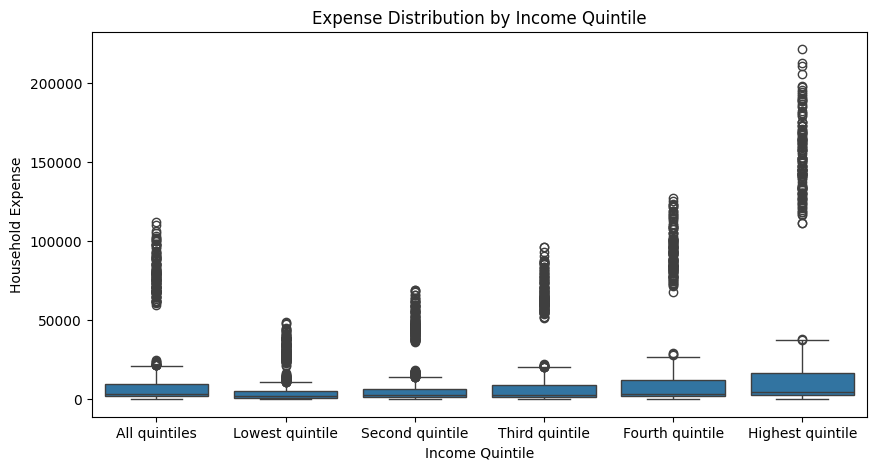

In [15]:
import seaborn as sns
# Plot boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Before-tax household income quintile"], y=df["Expense"])

# Labels and title
plt.xlabel("Income Quintile")
plt.ylabel("Household Expense")
plt.title("Expense Distribution by Income Quintile")
plt.show()

In [16]:
# Group by age and sum income & expense
age_savings = df.groupby("Age of older adult")[["Income", "Expense"]].sum()

# Calculate savings ratio
age_savings["Savings Ratio"] = age_savings["Income"] / age_savings["Expense"]

# Display results
print(age_savings.sort_values(by="Savings Ratio", ascending=False))


                          Income     Expense  Savings Ratio
Age of older adult                                         
Total all ages      1.386850e+09  20942243.0      66.222600
35 to 44 years      2.942892e+08  18758940.0      15.687945
45 to 54 years      3.232403e+08  24609299.0      13.134885
25 to 34 years      1.840406e+08  14171198.0      12.986945
55 to 64 years      3.115484e+08  36758192.0       8.475619
0 to 24 years       1.859581e+07  10158014.0       1.830654


In [17]:
# Group by year and sum income
yearly_income = df.groupby("REF_DATE")["Income"].sum()

# Calculate percentage growth
income_growth = yearly_income.pct_change() * 100

# Display results
print(income_growth)


REF_DATE
2010         NaN
2011    2.213974
2012    1.766625
2013    1.620785
2014    1.810797
2015    1.275331
2016    1.178468
2017    1.798971
2019    3.433198
2021    4.654588
Name: Income, dtype: float64


In [18]:
# calculate the expense to income ratio for each year

#group by year and sum income and expense
yearly_data=df.groupby("REF_DATE")[["Income","Expense"]].sum()

#calculate expense-to-income ratio
yearly_data["Expense Ratio"]=yearly_data["Expense"]/yearly_data["Income"]* 100

# display result
print(yearly_data["Expense Ratio"])

REF_DATE
2010    4.736835
2011    4.734893
2012    4.851527
2013    4.910126
2014    4.991310
2015    5.047809
2016    5.043371
2017    5.059396
2019    5.281882
2021    5.057414
Name: Expense Ratio, dtype: float64


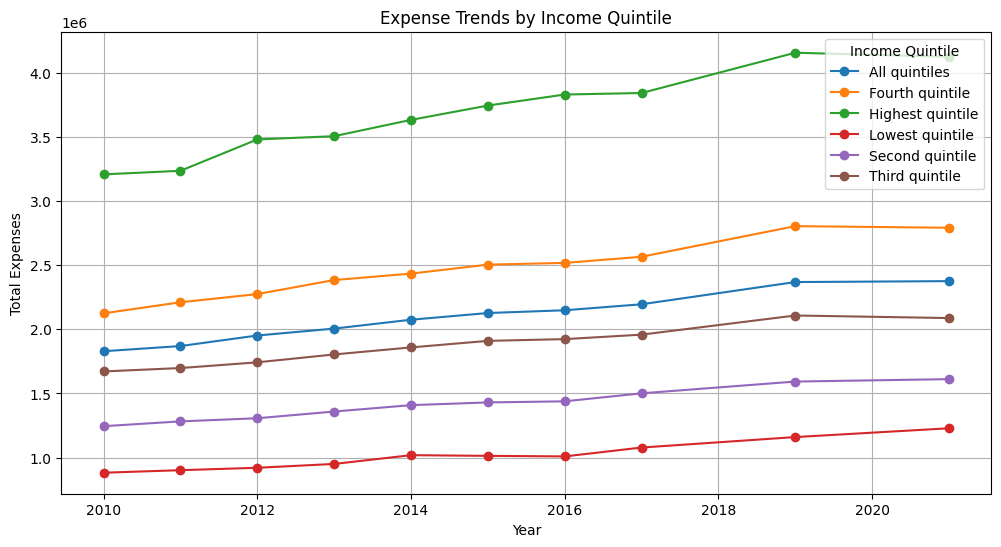

In [20]:
# compare expense trends across income quintiles
# Group by year and income quintile, then sum expenses
expense_trend = df.groupby(["REF_DATE", "Before-tax household income quintile"])["Expense"].sum().unstack()
# Plot the data
expense_trend.plot(figsize=(12, 6), marker='o')
# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Expenses")
plt.title("Expense Trends by Income Quintile")
plt.legend(title="Income Quintile")
plt.grid(True)
plt.show()

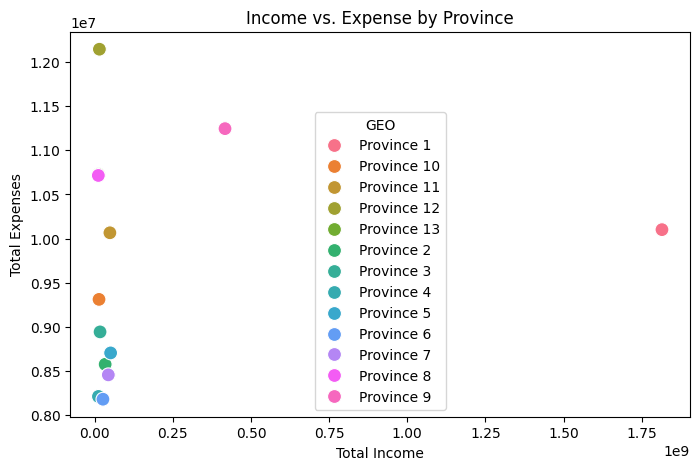

In [21]:
# Group by province and sum income & expense
province_data = df.groupby("GEO")[["Income", "Expense"]].sum()

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=province_data["Income"], y=province_data["Expense"],
hue=province_data.index, s=100)

# Labels and title
plt.xlabel("Total Income")
plt.ylabel("Total Expenses")
plt.title("Income vs. Expense by Province")
plt.show()

In [22]:
# Count frequency of each expense category
expense_category_counts = df["Household expenditures, summary-level categories"].value_counts()
# Display results
print(expense_category_counts)

Household expenditures, summary-level categories
Total expenditure                                          780
Food purchased from stores                                 780
Food purchased from restaurants                            780
Shelter                                                    780
Principal accommodation                                    780
Rented living quarters                                     780
Owned living quarters                                      780
Water, fuel and electricity for principal accommodation    780
Other accommodation                                        780
Household operations                                       780
Communications                                             780
Household furnishings and equipment                        780
Household furnishings                                      780
Household equipment                                        780
Household appliances                                       780
Clothi